In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import coremltools as ct

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
localpath = '/Users/mihirjoshi/Documents/DERM_AI'
dir = localpath + '/Skin cancer ISIC The International Skin Imaging Collaboration'
train = localpath + '/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
test = localpath + '/Skin cancer ISIC The International Skin Imaging Collaboration/Test'
files = os.listdir(dir)

# Any results you write to the current directory are saved as output.

In [22]:
pigmented_benign_keratosis_dir = os.path.join(train + '/pigmented benign keratosis')
actinic_keratosis_dir =  os.path.join(train + '/actinic keratosis')
basal_cell_carcinoma_dir =  os.path.join(train + '/basal cell carcinoma')
nevus_dir =  os.path.join(train + '/nevus')
vascular_lesion_dir =  os.path.join(train + '/vascular lesion')
dermatofibroma_dir =  os.path.join(train + '/dermatofibroma')
squamous_cell_carcinoma_dir =  os.path.join(train + '/squamous cell carcinoma')
seborrheic_keratosis_dir =  os.path.join(train + '/seborrheic keratosis')
melanoma_dir =  os.path.join(train + '/melanoma')

In [23]:
print('total training pigmented_benign_keratosis images:', len(os.listdir(pigmented_benign_keratosis_dir)))
print('total training actinic_keratosis images:', len(os.listdir(actinic_keratosis_dir)))
print('total training basal_cell_carcinoma images:', len(os.listdir(basal_cell_carcinoma_dir)))
print('total training nevus images:', len(os.listdir(nevus_dir)))
print('total training vascular_lesion images:', len(os.listdir(vascular_lesion_dir)))
print('total training dermatofibroma images:', len(os.listdir(dermatofibroma_dir)))
print('total training squamous_cell_carcinoma images:', len(os.listdir(squamous_cell_carcinoma_dir)))
print('total training seborrheic_keratosis images:', len(os.listdir(seborrheic_keratosis_dir)))
print('total training melanoma images:', len(os.listdir(melanoma_dir)))

total training pigmented_benign_keratosis images: 462
total training actinic_keratosis images: 114
total training basal_cell_carcinoma images: 376
total training nevus images: 357
total training vascular_lesion images: 139
total training dermatofibroma images: 95
total training squamous_cell_carcinoma images: 181
total training seborrheic_keratosis images: 77
total training melanoma images: 438


In [24]:
pigmented_benign_keratosis_files = os.listdir(pigmented_benign_keratosis_dir)
print(pigmented_benign_keratosis_files[:10])
actinic_keratosis_files = os.listdir(actinic_keratosis_dir)
print(actinic_keratosis_files[:10])
basal_cell_carcinoma_files = os.listdir(basal_cell_carcinoma_dir)
print(basal_cell_carcinoma_files[:10])
nevus_files = os.listdir(nevus_dir)
print(nevus_files[:10])
vascular_lesion_files = os.listdir(vascular_lesion_dir)
print(vascular_lesion_files[:10])
dermatofibroma_files = os.listdir(dermatofibroma_dir)
print(dermatofibroma_files[:10])
squamous_cell_carcinoma_files = os.listdir(squamous_cell_carcinoma_dir)
print(squamous_cell_carcinoma_files[:10])
seborrheic_keratosis_files = os.listdir(seborrheic_keratosis_dir)
print(seborrheic_keratosis_files[:10])
melanoma_files = os.listdir(melanoma_dir)
print(melanoma_files[:10])

['ISIC_0026790.jpg', 'ISIC_0024839.jpg', 'ISIC_0025716.jpg', 'ISIC_0025064.jpg', 'ISIC_0025851.jpg', 'ISIC_0025879.jpg', 'ISIC_0027713.jpg', 'ISIC_0024971.jpg', 'ISIC_0028622.jpg', 'ISIC_0025312.jpg']
['ISIC_0029460.jpg', 'ISIC_0031993.jpg', 'ISIC_0029500.jpg', 'ISIC_0026626.jpg', 'ISIC_0032135.jpg', 'ISIC_0029930.jpg', 'ISIC_0027896.jpg', 'ISIC_0033413.jpg', 'ISIC_0028190.jpg', 'ISIC_0026625.jpg']
['ISIC_0025299.jpg', 'ISIC_0025266.jpg', 'ISIC_0028583.jpg', 'ISIC_0028568.jpg', 'ISIC_0029919.jpg', 'ISIC_0027920.jpg', 'ISIC_0026343.jpg', 'ISIC_0031171.jpg', 'ISIC_0024795.jpg', 'ISIC_0030737.jpg']
['ISIC_0000025.jpg', 'ISIC_0000019.jpg', 'ISIC_0029460.jpg', 'ISIC_0000227.jpg', 'ISIC_0000541.jpg', 'ISIC_0000233.jpg', 'ISIC_0000353.jpg', 'ISIC_0000435.jpg', 'ISIC_0000421.jpg', 'ISIC_0000347.jpg']
['ISIC_0029448.jpg', 'ISIC_0031950.jpg', 'ISIC_0034196.jpg', 'ISIC_0033969.jpg', 'ISIC_0029514.jpg', 'ISIC_0033565.jpg', 'ISIC_0030722.jpg', 'ISIC_0025677.jpg', 'ISIC_0027672.jpg', 'ISIC_0025924.j

(450, 600, 3)


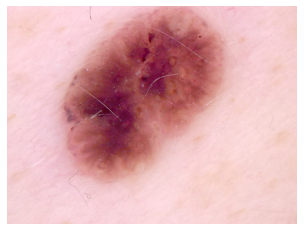

(450, 600, 3)


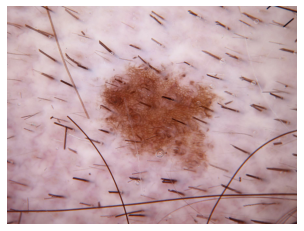

(450, 600, 3)


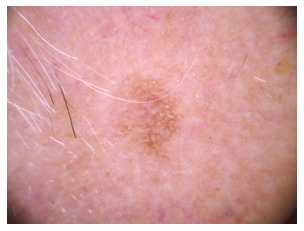

(450, 600, 3)


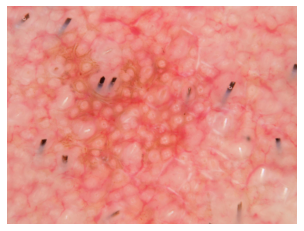

(450, 600, 3)


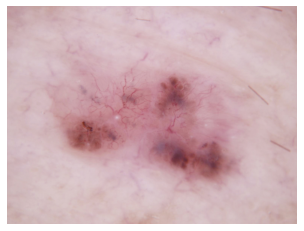

(450, 600, 3)


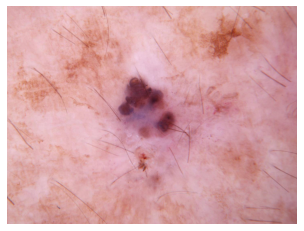

(1129, 1504, 3)


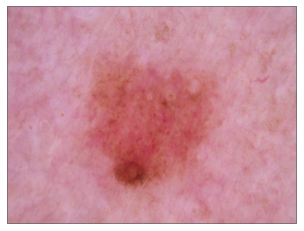

(1129, 1504, 3)


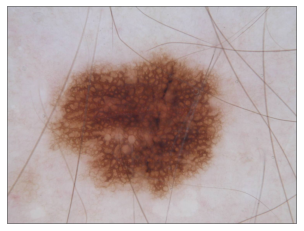

(450, 600, 3)


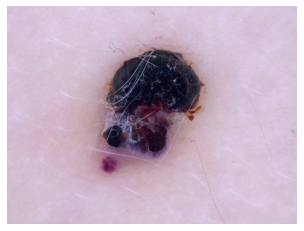

(450, 600, 3)


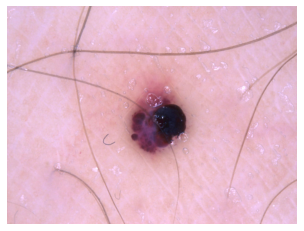

(450, 600, 3)


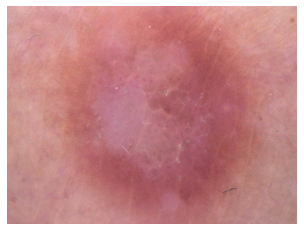

(450, 600, 3)


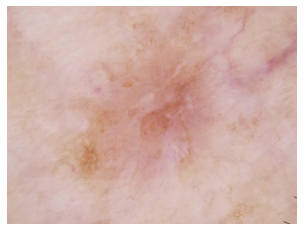

(450, 600, 3)


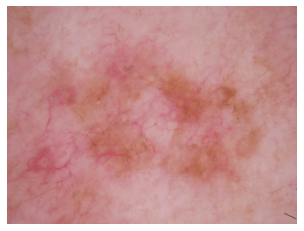

(450, 600, 3)


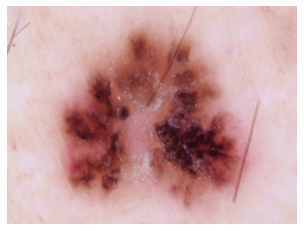

(768, 1024, 3)


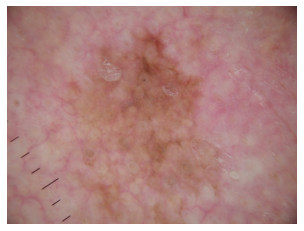

(768, 1024, 3)


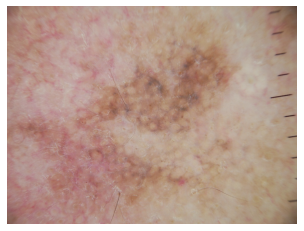

(768, 1024, 3)


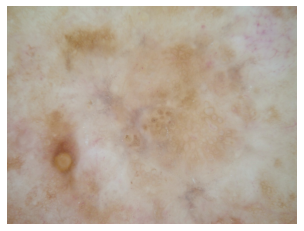

(768, 1024, 3)


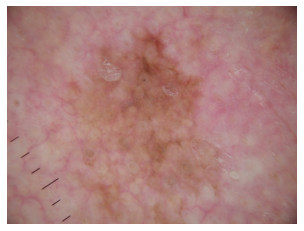

In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_pigmented_benign_keratosis = [os.path.join(pigmented_benign_keratosis_dir, fname) 
                for fname in pigmented_benign_keratosis_files[pic_index-2:pic_index]]

next_actinic_keratosis = [os.path.join(actinic_keratosis_dir, fname) 
                for fname in actinic_keratosis_files[pic_index-2:pic_index]]
next_basal_cell_carcinoma = [os.path.join(basal_cell_carcinoma_dir, fname) 
                for fname in basal_cell_carcinoma_files[pic_index-2:pic_index]]
next_nevus = [os.path.join(nevus_dir, fname) 
                for fname in nevus_files[pic_index-2:pic_index]]
next_vascular_lesion = [os.path.join(vascular_lesion_dir, fname) 
                for fname in vascular_lesion_files[pic_index-2:pic_index]]
next_dermatofibroma = [os.path.join(dermatofibroma_dir, fname) 
                for fname in dermatofibroma_files[pic_index-2:pic_index]]
next_squamous_cell_carcinoma = [os.path.join(squamous_cell_carcinoma_dir, fname) 
                for fname in squamous_cell_carcinoma_files[pic_index-2:pic_index]]
next_seborrheic_keratosis = [os.path.join(seborrheic_keratosis_dir, fname) 
                for fname in seborrheic_keratosis_files[pic_index-2:pic_index]]
next_melanoma = [os.path.join(melanoma_dir, fname) 
                for fname in melanoma_files[pic_index-2:pic_index]]


for i,img_path in enumerate(next_pigmented_benign_keratosis+next_actinic_keratosis+next_basal_cell_carcinoma+next_nevus+next_vascular_lesion+next_dermatofibroma+next_squamous_cell_carcinoma+next_seborrheic_keratosis+next_melanoma):
    #print(img_path)
    img = mpimg.imread(img_path)
    print(img.shape)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()


In [26]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = train
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
VALIDATION_DIR = TRAINING_DIR = train

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(128,128),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(128,128),
	class_mode='categorical'
)



Found 2239 images belonging to 9 classes.
Found 2239 images belonging to 9 classes.


In [9]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(128, 128, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # The second convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The third convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fourth convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.5),
#     # 512 neuron hidden layer
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(9, activation='softmax')
# # ])

# model.summary()

# model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# history = model.fit_generator(train_generator,epochs=100, batch_size=64, validation_data = validation_generator, verbose = 1)

# model.save("SkinCancer.h5") # save as a tfkeras
# coreMLModel = ct.convert(model)
# print(coreMLModel)

# # spec = coreMLModel.get_spec()
# # ct.utils.rename_feature(spec, "input.1", "inputImage")
# # ct.utils.rename_feature(spec, "1648", "outputImage")
# # coreMLModel = ct.models.MLModel(spec)

# coreMLModel.save("dermAINet.mlmodel")


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

/var/folders/zq/gw91vncx7hgcs9mspyj7dtk40000gn/T/ipykernel_98426/479901152.py:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,epochs=5, steps_per_epoch=10,validation_data = validation_generator, verbose = 1)


Epoch 1/5
10/10 [==============================] - 97s 10s/step - loss: 2.2498 - accuracy: 0.2188 - val_loss: 2.0689 - val_accuracy: 0.2314
Epoch 2/5
10/10 [==============================] - ETA: 0s - loss: 2.1161 - accuracy: 0.2188

In [28]:
# DERM AI MODEL
model = tf.keras.models.Sequential([
    # The first convoultion
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)      

In [ ]:
history = model.fit_generator(train_generator,epochs=100, batch_size=64, validation_data = validation_generator, verbose = 1)

In [ ]:

model.save("SkinCancer.h5") # save as a tfkeras
coreMLModel = ct.convert(model)
print(coreMLModel)

# spec = coreMLModel.get_spec()
# ct.utils.rename_feature(spec, "input.1", "inputImage")
# ct.utils.rename_feature(spec, "1648", "outputImage")
# coreMLModel = ct.models.MLModel(spec)

coreMLModel.save("dermAINet.mlmodel")

In [16]:
# # VGG Model
# vggModel = tf.keras.applications.vgg16.VGG16(
#     include_top=False,
#     weights='imagenet',
#     input_tensor=None,
#     input_shape=(150, 150, 3),
#     pooling='avg',
# )

# # Freeze trainable flag (false)
# vggModel.trainable = False


In [14]:

# input_tensor = tf.keras.Input((150,150,3))

# vgg_out = vggModel(input_tensor)
# # Flattening
# y = tf.keras.layers.Flatten()(vgg_out)
# y  = tf.keras.layers.Dense(512)(y)
# y = tf.keras.layers.Dense(9)(y)

# vgg_cnn_model = tf.keras.Model(inputs=input_tensor,outputs=y)
# # Call Classifier

In [15]:
# vgg_cnn_model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# vgg_cnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 9)                 4617      
                                                                 
Total params: 14,981,961
Trainable params: 14,981,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# history = model.fit_generator(train_generator,epochs=100, batch_size=64, validation_data = validation_generator, verbose = 1)

In [ ]:
import shutil

In [ ]:
os.download('.')

In [29]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.plot(epochs, loss, 'o', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

NameError: name 'history' is not defined